In [15]:
from keras.datasets import mnist
import numpy as np
import pylab as plt
%matplotlib inline
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

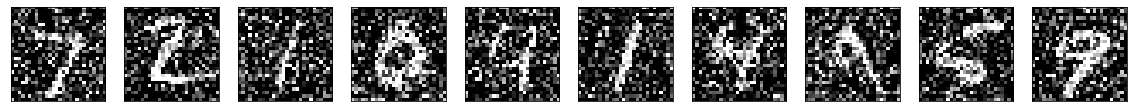

In [16]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [17]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0224 15:15:01.089700 139707801699840 deprecation_wrapper.py:119] From /home/ishanu/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0224 15:15:01.184607 139707801699840 deprecation.py:323] From /home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

W0224 15:17:56.526791 139707801699840 deprecation_wrapper.py:119] From /home/ishanu/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 42s 697us/step - loss: 0.1808 - val_loss: 0.1208
Epoch 2/100
60000/60000 [==============================] - 45s 742us/step - loss: 0.1195 - val_loss: 0.1127
Epoch 3/100
60000/60000 [==============================] - 45s 756us/step - loss: 0.1120 - val_loss: 0.1062
Epoch 4/100
60000/60000 [==============================] - 46s 764us/step - loss: 0.1080 - val_loss: 0.1040
Epoch 5/100
60000/60000 [==============================] - 46s 775us/step - loss: 0.1057 - val_loss: 0.1034
Epoch 6/100
60000/60000 [==============================] - 48s 808us/step - loss: 0.1040 - val_loss: 0.1040
Epoch 7/100
60000/60000 [==============================] - 48s 797us/step - loss: 0.1028 - val_loss: 0.1012
Epoch 8/100
60000/60000 [==============================] - 47s 789us/step - loss: 0.1020 - val_loss: 0.1000
Epoch 9/100
60000/60000 [==============================] - 48s 798us/step - loss: 0.10

Epoch 76/100
60000/60000 [==============================] - 49s 813us/step - loss: 0.0946 - val_loss: 0.0942
Epoch 77/100
60000/60000 [==============================] - 50s 830us/step - loss: 0.0946 - val_loss: 0.0944
Epoch 78/100
60000/60000 [==============================] - 49s 812us/step - loss: 0.0945 - val_loss: 0.0940
Epoch 79/100
60000/60000 [==============================] - 49s 809us/step - loss: 0.0945 - val_loss: 0.0943
Epoch 80/100
60000/60000 [==============================] - 49s 811us/step - loss: 0.0945 - val_loss: 0.0941
Epoch 81/100
60000/60000 [==============================] - 49s 815us/step - loss: 0.0944 - val_loss: 0.0939
Epoch 82/100
60000/60000 [==============================] - 49s 810us/step - loss: 0.0944 - val_loss: 0.0941
Epoch 83/100
60000/60000 [==============================] - 48s 808us/step - loss: 0.0944 - val_loss: 0.0947
Epoch 84/100
60000/60000 [==============================] - 48s 807us/step - loss: 0.0944 - val_loss: 0.0940
Epoch 85/100
60000/